In [122]:
import h5py

In [123]:
from numpy import *

In [124]:
murange = array([0, 0.2, 0.4])

In [125]:
fnames = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5']#, 'data_06.hdf5']

In [126]:
folder = 'newdata/'

In [127]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

In [128]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [129]:
Tkeys

['170', '199', '230', '260', '290', '320', '349', '379']

In [130]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

/tmp/ipykernel_316795/2081089261.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [131]:
Ps_mu = array(Ps_mu)

In [132]:
Ps_mu.shape

(3, 8)

In [133]:
from scipy.optimize import least_squares

In [138]:
def fit_func(x, muT):
    return x[0]/2 * (muT)**2 + x[1]/4*(muT)**4

In [157]:
i = 5
T = Trange[i]

In [158]:
sol = least_squares(lambda z: fit_func(z, murange) - (Ps_mu[:, i] - Ps_mu[0, i])/T**4, [0.15, 0.2])
sol

     message: `gtol` termination condition is satisfied.
     success: True
      status: 1
         fun: [ 0.000e+00 -6.759e-12 -4.179e-11]
           x: [ 9.926e-01 -3.547e+00]
        cost: 8.9592740517796e-22
         jac: [[ 0.000e+00 -0.000e+00]
               [ 2.000e-02  4.000e-04]
               [ 8.000e-02  6.400e-03]]
        grad: [-3.478e-12 -2.701e-13]
  optimality: 3.478155197653363e-12
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 6
        njev: 6

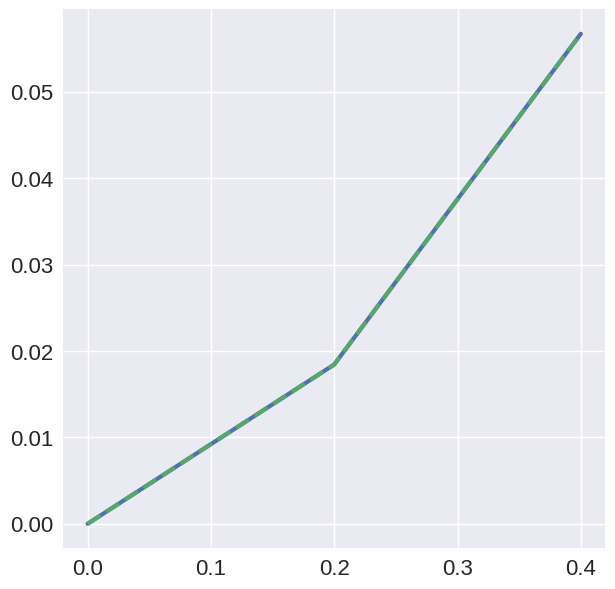

In [159]:
plt.plot(murange, (Ps_mu[:, i] - Ps_mu[0, i])/T**4)
plt.plot(murange, fit_func(sol.x, murange), ls='--')